<a href="https://colab.research.google.com/github/ankita-hanamshet/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Step1: Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

# **Step2: Reading Dataset and Understanding Data**

In [4]:
#Read the data
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone - ML Regression - Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [5]:
# Copy the data for backup
df = data.copy()

In [6]:
# Getting feel of the data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.shape

(8760, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Step3: Cleaning Data**

**3.1 Handle Missing values**

In [12]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Inference: There are no null values

**3.2 Handle Duplicate values**

In [13]:
# Checking duplicate
df.duplicated().sum()

0

Inference: There are no duplicate values

**3.3 Convert columns to required data type**

In [14]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 


# drop the Date column
df.drop(columns=['Date'],inplace=True)



In [15]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [16]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [17]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [18]:
numeric_features.nunique()

Rented Bike Count            2166
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
dtype: int64

In [19]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


In [20]:
categorical_features.nunique()

Hour               24
Seasons             4
Holiday             2
Functioning Day     2
day_of_week         7
month              12
year                2
dtype: int64

**3.4 Handle Outliers**

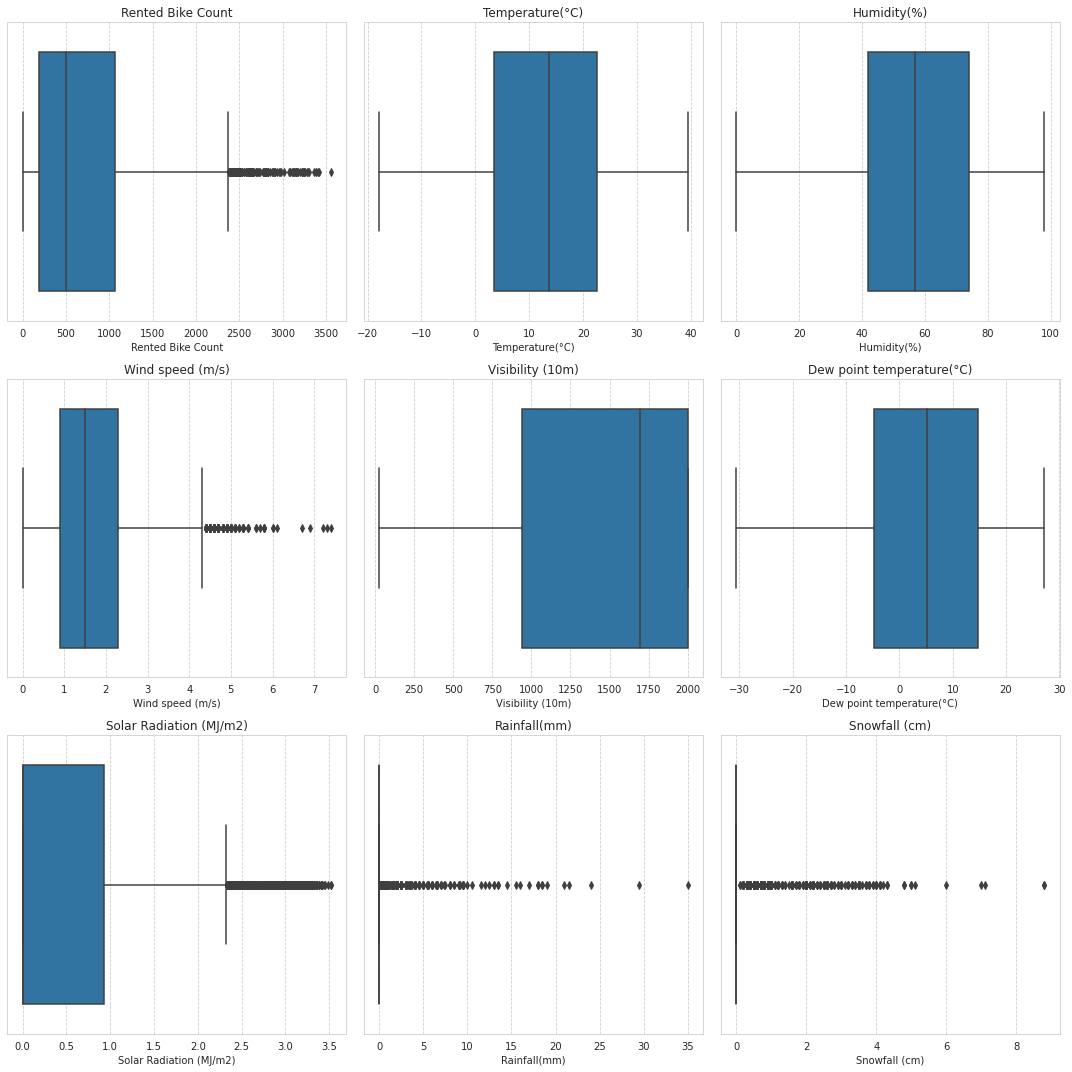

In [21]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(15,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

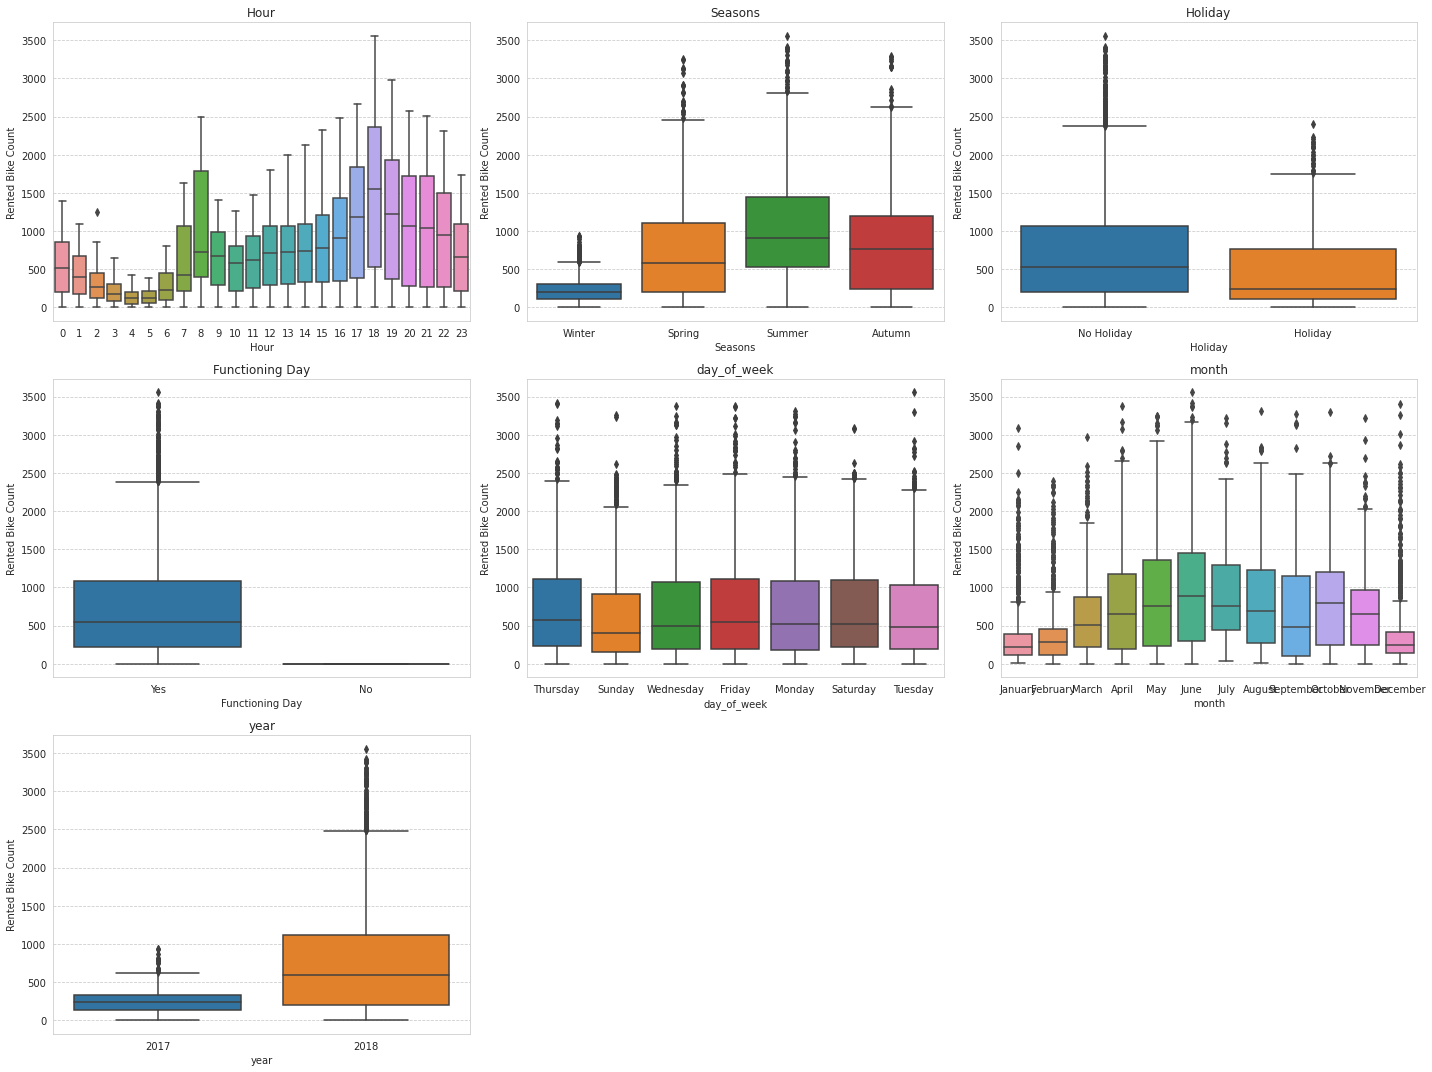

In [22]:
# Boxplot for categorical variables to see demands
n = 1
plt.figure(figsize=(20,15))


for i in categorical_features.columns:
    plt.subplot(3,3,n)
    n=n+1
    sns.boxplot(data=df, x=i, y='Rented Bike Count')
    plt.title(i)
    plt.tight_layout()


#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

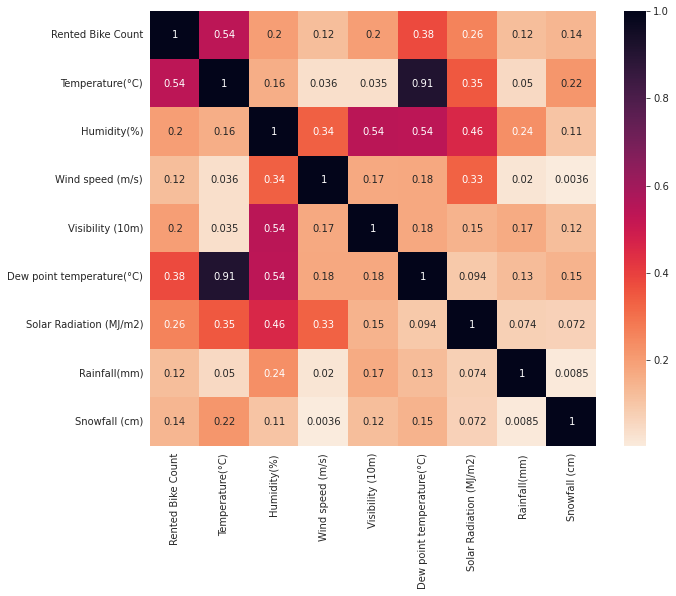

In [23]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='rocket_r',annot=True)


In [24]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017


In [25]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [26]:
new_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [28]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Lasso**

In [33]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)


0.759301198322665

In [34]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [35]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0014}
-37.98242009594986


In [36]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

In [37]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

mean absolute error is  : 226.50044330240735
mean squared error is  : 112248.47507881426
Root mean squared error is  : 335.03503559898667
R2 score is  : 0.7308898285972246
